In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df= pd.read_csv("/content/EmpRate.csv") #read the csv file

In [ ]:
df.axes

[RangeIndex(start=0, stop=41, step=1),
 Index(['Employment rate', 'Life satisfaction'], dtype='object')]

In [ ]:
print(df)

    Employment rate  Life satisfaction
0                73                7.3
1                72                7.1
2                63                6.9
3                73                7.4
4                63                6.5
5                67                6.3
6                74                6.7
7                74                7.6
8                74                5.7
9                70                7.6
10               65                6.5
11               75                7.0
12               53                5.4
13               68                5.6
14               86                7.5
15               67                7.0
16               69                7.2
17               58                6.0
18               75                5.9
19               67                5.9
20               70                5.9
21               70                5.9
22               66                6.9
23               61                6.5
24               76      

In [ ]:
avgEmpRate=df[df["Employment rate"]!= ".."].mean()

In [ ]:
print(avgEmpRate)

Employment rate      68.463415
Life satisfaction     6.534146
dtype: float64


In [ ]:
x=df[["Employment rate"]]
y=df[["Life satisfaction"]]

In [ ]:
model= LinearRegression()
model.fit(x,y) 

LinearRegression()

In [ ]:
print("r_squared value is ", model.score(x,y))

r_squared value is  0.4417812120208363


In [ ]:
b0= model.intercept_
b1= model.coef_
print(" Equation of the regression line is y_est= {} + {}*x".format(b0,b1))

 Equation of the regression line is y_est= [2.23960101] + [[0.06272759]]*x


In [ ]:
yEst= model.predict(x)

Text(0, 0.5, 'Life satisfaction value')

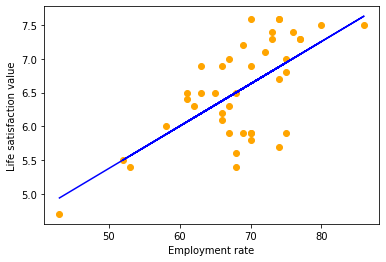

In [ ]:
plt.scatter(x,y,color="orange")
plt.plot(x,yEst,"r",color="Blue")
plt.xlabel("Employment rate")
plt.ylabel("Life satisfaction value")

In [ ]:
x = sm.add_constant(x)

In [ ]:
modelNew = sm.OLS(y, x) 
fitted = modelNew.fit()

In [ ]:
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Life satisfaction   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     30.87
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           2.14e-06
Time:                        17:45:07   Log-Likelihood:                -33.530
No. Observations:                  41   AIC:                             71.06
Df Residuals:                      39   BIC:                             74.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.2396      0.778      2.879      0.006       0.666       3.813
Employment rate     0.0627      0.011      5.556      0.000       0.040       0.086
==============================================================================
Omnibus:                        2.716   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.257   Jarque-Bera (JB):                2.476
Skew:                          -0.525   Prob(JB):                        0.290
Kurtosis:                       2.409   Cond. No.                         611.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
fitted.ssr

12.321114009015213

In [ ]:
sse = np.sum((fitted.fittedvalues - df["Life satisfaction"])**2)
print("SSE =", sse)

SSE = 12.321114009015211


In [ ]:
ssr = np.sum((fitted.fittedvalues - df["Life satisfaction"].mean())**2)
print("SSR = ", ssr)

SSR =  9.751081112936006


In [ ]:
sst = ssr + sse
print("SST = ", sst)

SST =  22.072195121951218


In [ ]:
#msr value
msr = ssr/1
print("MSR=",msr)

MSR= 9.751081112936006


In [ ]:
size = df.size

In [ ]:
#mse value
mse = sse/(size-2)
print("MSE=",mse)

MSE= 0.15401392511269013


In [ ]:
# T and F test
ftest = msr/mse
print("F test=",ftest)

F test= 63.3129835876935


In [ ]:
Ttest = np.sqrt(ftest)
print("T test=",Ttest)

T test= 7.95694561924948


Conclusion - After completing this experiment, I learned how to create a simple linear regression model using the linear regression function, how to create an ANOVA table, and how to use the T and F statistics to identify the relationship between the provided columns. Then I learned how to use functions like fit, score, intercept_, coef_, predict, and others to fit the model to our data and retrieve various values such as r squared, intercept, coefficient, and y. Then we can look at the regression findings and see what other parameters we can identify, such as SSR, SSE, SST, MSR, and MSE.